# Benchmark

#### Create problem instances

In [15]:

from utils import *
# per ogni instanza risolvere il problema 10 volte per ogni tipo di algoritmo
# creare 5-6 instanze diverse

NUM_MACHINES = [3,3,5,5,7,7]
NUM_JOBS = [30,30,40,40,30,30]
MAX_TIME_JOBS = [100,100,400,400,500,500]
SORT_FROM_LONGEST = [True,False,True,False,True,False]

instances_problem = [{"id":f"I{i+1}",**create_instance_problem(NUM_JOBS[i],MAX_TIME_JOBS[i],NUM_MACHINES[i],SORT_FROM_LONGEST[i])} for i in range(6)]

for instance_problem in instances_problem:
    print(instance_problem["list_jobs"])



[{'name': 'job9', 'start_time': 0, 'work_time': 93}, {'name': 'job19', 'start_time': 0, 'work_time': 91}, {'name': 'job21', 'start_time': 0, 'work_time': 76}, {'name': 'job26', 'start_time': 0, 'work_time': 75}, {'name': 'job18', 'start_time': 0, 'work_time': 74}, {'name': 'job3', 'start_time': 0, 'work_time': 70}, {'name': 'job13', 'start_time': 0, 'work_time': 68}, {'name': 'job30', 'start_time': 0, 'work_time': 68}, {'name': 'job4', 'start_time': 0, 'work_time': 67}, {'name': 'job27', 'start_time': 0, 'work_time': 65}, {'name': 'job1', 'start_time': 0, 'work_time': 64}, {'name': 'job29', 'start_time': 0, 'work_time': 62}, {'name': 'job23', 'start_time': 0, 'work_time': 61}, {'name': 'job8', 'start_time': 0, 'work_time': 58}, {'name': 'job17', 'start_time': 0, 'work_time': 55}, {'name': 'job24', 'start_time': 0, 'work_time': 54}, {'name': 'job10', 'start_time': 0, 'work_time': 50}, {'name': 'job6', 'start_time': 0, 'work_time': 48}, {'name': 'job11', 'start_time': 0, 'work_time': 48}

Create algorithm instance and init benchmarks instances

In [16]:
ITERATIONS_PER_INSTANCE = 10


algorithms:list[AlgorithmType] = []
for chooser_job in CHOOSER_JOBS_WAY:
    for neighbor_way in NEIGHBORS_WAY:
        algorithms.append({
            "id":f"{chooser_job.__name__}-{neighbor_way.__name__}",
            "chooser_job":chooser_job,
            "neighbor_way":neighbor_way
        })

benchmarks:list[BenchmarkType] = [
    {"instance_id":instance_problem["id"],"solutions":[{
        "id_algorithm":a["id"],"initial_solutions":[],
        "final_solutions":[],
        "executions_greedy_time":[],
        "executions_local_search_time":[]} for a in algorithms]}
        for instance_problem in instances_problem]


print(algorithms)
print(len(benchmarks[0]["solutions"]))

[{'id': 'deterministic_way-insert_move', 'chooser_job': <function deterministic_way at 0x7fe293125510>, 'neighbor_way': <function insert_move at 0x7fe2580b8940>}, {'id': 'deterministic_way-swap_move', 'chooser_job': <function deterministic_way at 0x7fe293125510>, 'neighbor_way': <function swap_move at 0x7fe2580b89d0>}, {'id': 'non_deterministic_way-insert_move', 'chooser_job': <function non_deterministic_way at 0x7fe2580b8430>, 'neighbor_way': <function insert_move at 0x7fe2580b8940>}, {'id': 'non_deterministic_way-swap_move', 'chooser_job': <function non_deterministic_way at 0x7fe2580b8430>, 'neighbor_way': <function swap_move at 0x7fe2580b89d0>}, {'id': 'random_way-insert_move', 'chooser_job': <function random_way at 0x7fe2580b8790>, 'neighbor_way': <function insert_move at 0x7fe2580b8940>}, {'id': 'random_way-swap_move', 'chooser_job': <function random_way at 0x7fe2580b8790>, 'neighbor_way': <function swap_move at 0x7fe2580b89d0>}]
6


Print list of instance problems

In [17]:
for index_instance,benchmark in enumerate(benchmarks):
    instance_problem = list(filter(lambda i: i["id"]==benchmark["instance_id"],instances_problem))[0]
    print(instance_problem)

{'id': 'I1', 'num_jobs': 30, 'max_time_jobs': 100, 'num_machines': 3, 'sort_from_longest': True, 'list_jobs': [{'name': 'job9', 'start_time': 0, 'work_time': 93}, {'name': 'job19', 'start_time': 0, 'work_time': 91}, {'name': 'job21', 'start_time': 0, 'work_time': 76}, {'name': 'job26', 'start_time': 0, 'work_time': 75}, {'name': 'job18', 'start_time': 0, 'work_time': 74}, {'name': 'job3', 'start_time': 0, 'work_time': 70}, {'name': 'job13', 'start_time': 0, 'work_time': 68}, {'name': 'job30', 'start_time': 0, 'work_time': 68}, {'name': 'job4', 'start_time': 0, 'work_time': 67}, {'name': 'job27', 'start_time': 0, 'work_time': 65}, {'name': 'job1', 'start_time': 0, 'work_time': 64}, {'name': 'job29', 'start_time': 0, 'work_time': 62}, {'name': 'job23', 'start_time': 0, 'work_time': 61}, {'name': 'job8', 'start_time': 0, 'work_time': 58}, {'name': 'job17', 'start_time': 0, 'work_time': 55}, {'name': 'job24', 'start_time': 0, 'work_time': 54}, {'name': 'job10', 'start_time': 0, 'work_time'

### Run all Algorithms

In [18]:
import sys
for index_instance,benchmark in enumerate(benchmarks):
    instance_problem = list(filter(lambda i: i["id"]==benchmark["instance_id"],instances_problem))[0]
    for index_solution,solution in enumerate(benchmark["solutions"]):
        algorithm = list(filter(lambda a: a["id"]==solution["id_algorithm"],algorithms))[0]
        for i in range(ITERATIONS_PER_INSTANCE):
            sys.stdout.write(f"\rInstance {index_instance+1}/{len(benchmarks)} - Solution {index_solution+1}/{len(benchmark['solutions'])} - Iteration {i+1}/{ITERATIONS_PER_INSTANCE} ")
            initial_schedule,greedy_time = greedy_algorithm(instance_problem,algorithm["chooser_job"])
            best__schedule,local_search_time = local_search_algorithm(initial_schedule,algorithm["neighbor_way"])

            solution["initial_solutions"].append(get_solution(initial_schedule))
            solution["final_solutions"].append(get_solution(best__schedule))
            solution["executions_greedy_time"].append(greedy_time)
            solution["executions_local_search_time"].append(local_search_time)


Instance 1/6 - Solution 2/6 - Iteration 1/10  

Instance 6/6 - Solution 6/6 - Iteration 10/10 

Calculate statistics per instances

In [19]:
import itertools
import numpy as np
for benchmark in benchmarks:
    list_final_solutions = list(itertools.chain(*[s["final_solutions"] for s in benchmark["solutions"]]))
    list_final_time = [s["executions_local_search_time"][i] + s["executions_greedy_time"][i] for s in benchmark["solutions"] for i in range(len(s["executions_greedy_time"])) ]
    benchmark['results_per_instance']={
        "best_solution":min(list_final_solutions),
        "wrongest_solution":max(list_final_solutions),
        "average_solution":sum(list_final_solutions)/len(list_final_solutions),
        "num_best_solution":list_final_solutions.count(min(list_final_solutions)),
        "awarage_time":sum(list_final_time)/len(list_final_time),
        "standard_deviation_solution": np.std(np.array(list_final_solutions)),
        "standard_deviation_time": np.std(np.array(list_final_time)),
        }
    print(benchmark["results_per_instance"])

{'best_solution': 513, 'wrongest_solution': 535, 'average_solution': 516.5166666666667, 'num_best_solution': 17, 'awarage_time': 0.1341666666666666, 'standard_deviation_solution': 5.460438525328244, 'standard_deviation_time': 0.13460177892170996}
{'best_solution': 550, 'wrongest_solution': 560, 'average_solution': 553.0166666666667, 'num_best_solution': 7, 'awarage_time': 0.1426666666666666, 'standard_deviation_solution': 2.117322732970946, 'standard_deviation_time': 0.14340928220384558}
{'best_solution': 1449, 'wrongest_solution': 1511, 'average_solution': 1459.2166666666667, 'num_best_solution': 11, 'awarage_time': 0.7783333333333332, 'standard_deviation_solution': 11.654886910171582, 'standard_deviation_time': 0.8603025953439611}
{'best_solution': 1832, 'wrongest_solution': 1898, 'average_solution': 1859.2666666666667, 'num_best_solution': 2, 'awarage_time': 0.867166666666667, 'standard_deviation_solution': 14.928570669096965, 'standard_deviation_time': 0.8550147984424337}
{'best_so

Calculate solutions results per instances

In [20]:
import numpy as np

for benchmark in benchmarks:
    for solution in benchmark["solutions"]:
        solution["results_per_instance"] = {
            "best_solution":min(solution["final_solutions"]),
            "wrongest_solution":max(solution["final_solutions"]),
            "average_solution":sum(solution["final_solutions"])/len(solution["final_solutions"]),
            "num_best_solution":solution["final_solutions"].count(benchmark["results_per_instance"]["best_solution"]),
            "awarage_time":(sum(solution["executions_greedy_time"])+sum(solution["executions_local_search_time"]))/len(solution["executions_greedy_time"]),
            "standard_deviation_solution": np.std(np.array(solution["final_solutions"])),
            "standard_deviation_time": np.std(np.array(solution["executions_local_search_time"]) + np.array(solution["executions_greedy_time"]))
        }
        print(solution["results_per_instance"])

{'best_solution': 514, 'wrongest_solution': 514, 'average_solution': 514.0, 'num_best_solution': 0, 'awarage_time': 0.019999999999999997, 'standard_deviation_solution': 0.0, 'standard_deviation_time': 3.469446951953614e-18}
{'best_solution': 513, 'wrongest_solution': 513, 'average_solution': 513.0, 'num_best_solution': 10, 'awarage_time': 0.19299999999999998, 'standard_deviation_solution': 0.0, 'standard_deviation_time': 0.08660831368869851}
{'best_solution': 514, 'wrongest_solution': 523, 'average_solution': 517.8, 'num_best_solution': 0, 'awarage_time': 0.015, 'standard_deviation_solution': 2.5612496949731396, 'standard_deviation_time': 0.005}
{'best_solution': 513, 'wrongest_solution': 516, 'average_solution': 513.7, 'num_best_solution': 6, 'awarage_time': 0.304, 'standard_deviation_solution': 1.004987562112089, 'standard_deviation_time': 0.10809255293497327}
{'best_solution': 515, 'wrongest_solution': 535, 'average_solution': 525.5, 'num_best_solution': 0, 'awarage_time': 0.024, 's

Calculate statistics per algorithms

In [21]:
for algorithm in algorithms:
    list_final_time = [s["executions_local_search_time"][i] + s["executions_greedy_time"][i] for s in filter(lambda s: s["id_algorithm"]==algorithm["id"],benchmarks[0]["solutions"]) for i in range(len(s["executions_greedy_time"])) ]
    list_standard_deviation = [s["results_per_instance"]["standard_deviation_solution"] for s in filter(lambda s: s["id_algorithm"]==algorithm["id"],benchmarks[0]["solutions"])]
    list_num_best = [s["results_per_instance"]["num_best_solution"] for s in filter(lambda s: s["id_algorithm"]==algorithm["id"],benchmarks[0]["solutions"])]
    list_standard_deviation_time = [s["results_per_instance"]["standard_deviation_time"] for s in filter(lambda s: s["id_algorithm"]==algorithm["id"],benchmarks[0]["solutions"])]
    algorithm['statistics']={
        "standard_deviation_average": sum(list_standard_deviation)/len(list_standard_deviation),
        "num_best_average": sum(list_num_best)/len(list_num_best),
        "standard_deviation_time_average": sum(list_standard_deviation_time)/len(list_standard_deviation_time),
        "average_time": sum(list_final_time)/len(list_final_time),
    }
    print(algorithm["statistics"])

{'standard_deviation_average': 0.0, 'num_best_average': 0.0, 'standard_deviation_time_average': 3.469446951953614e-18, 'average_time': 0.019999999999999997}
{'standard_deviation_average': 0.0, 'num_best_average': 10.0, 'standard_deviation_time_average': 0.08660831368869851, 'average_time': 0.19299999999999998}
{'standard_deviation_average': 2.5612496949731396, 'num_best_average': 0.0, 'standard_deviation_time_average': 0.005, 'average_time': 0.015}
{'standard_deviation_average': 1.004987562112089, 'num_best_average': 6.0, 'standard_deviation_time_average': 0.10809255293497327, 'average_time': 0.304}
{'standard_deviation_average': 7.619055059520177, 'num_best_average': 0.0, 'standard_deviation_time_average': 0.0142828568570857, 'average_time': 0.024}
{'standard_deviation_average': 1.5132745950421556, 'num_best_average': 1.0, 'standard_deviation_time_average': 0.06655073252789935, 'average_time': 0.24900000000000003}


Save on excel file

In [22]:
import  pandas as pd
path="benchmarks.xlsx"
solutions_results = pd.DataFrame([{"instance_id":benchmark["instance_id"],"id_algorithm":solution["id_algorithm"],"iterations":ITERATIONS_PER_INSTANCE,**solution["results_per_instance"]} for benchmark in benchmarks for solution in benchmark["solutions"] ])
instance_results = pd.DataFrame([{"instance_id":benchmark["instance_id"],**benchmark["results_per_instance"]} for benchmark in benchmarks])
algorithm_statistics =pd.DataFrame([{"id_algorithm":algorithm["id"],**algorithm["statistics"]} for algorithm in algorithms])
instances_problem = pd.DataFrame(instances_problem)

with pd.ExcelWriter(path) as writer:
    instances_problem.to_excel(writer, sheet_name="Instances Problems")
    solutions_results.to_excel(writer, sheet_name="Solution Results per instances")
    instance_results.to_excel(writer, sheet_name="Instance Statistics")
    algorithm_statistics.to_excel(writer, sheet_name="Algorithm Statistics")


Bozza boxplot

array([[<Axes: title={'center': 'best_solution'}, xlabel='id_algorithm'>,
        <Axes: title={'center': 'wrongest_solution'}, xlabel='id_algorithm'>],
       [<Axes: title={'center': 'average_solution'}, xlabel='id_algorithm'>,
        <Axes: >]], dtype=object)

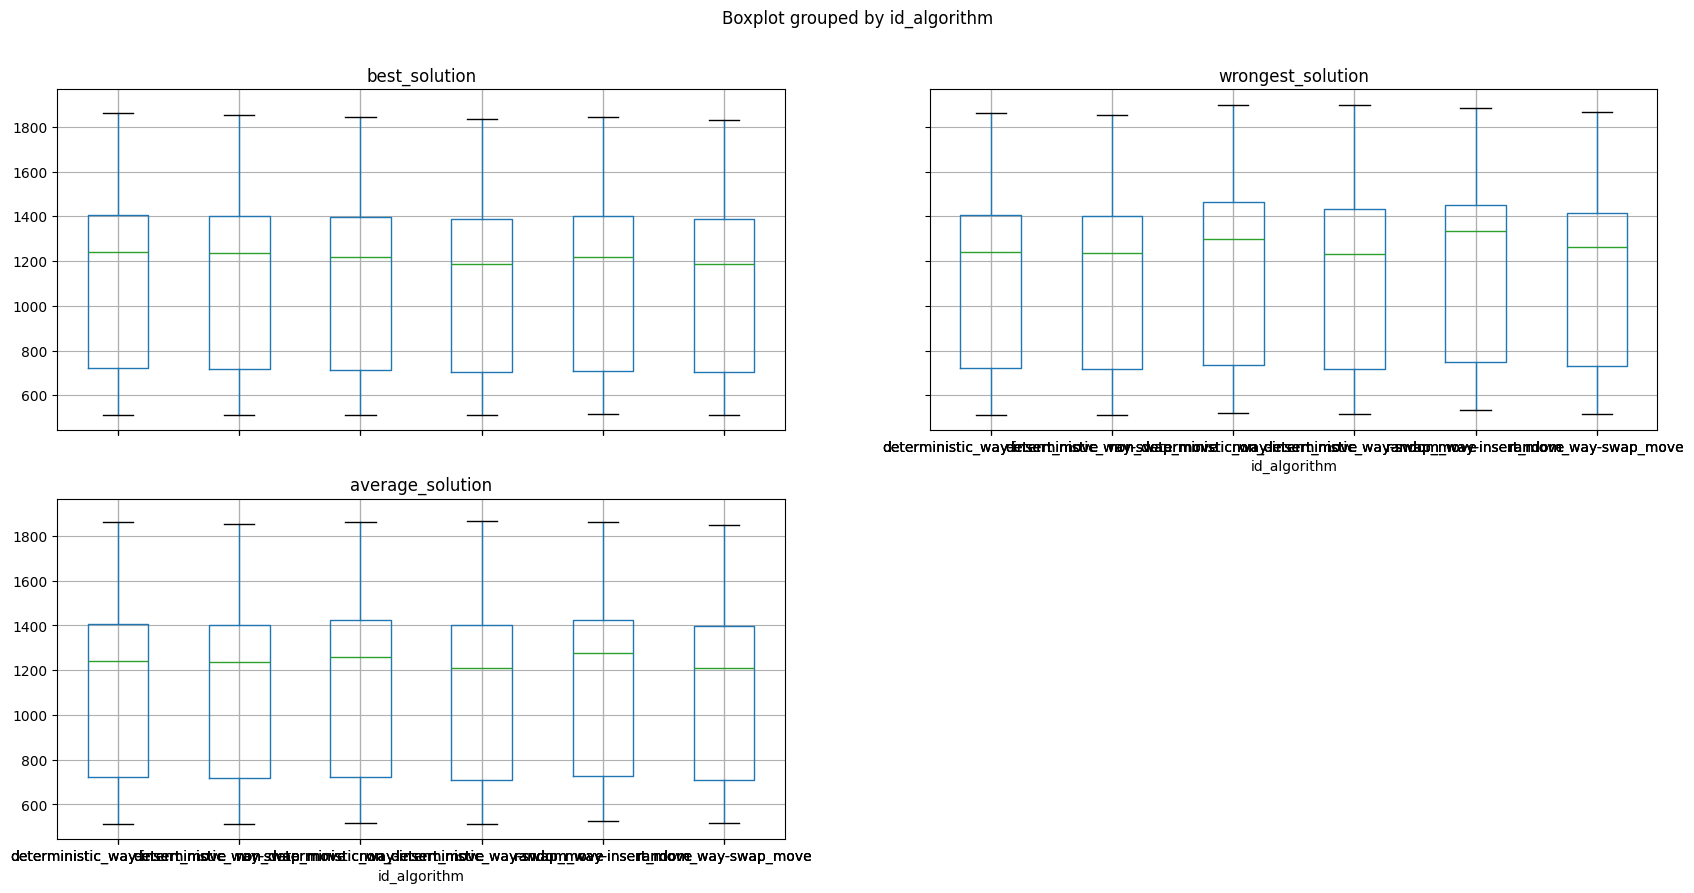

In [24]:
solutions_results.boxplot(column=["best_solution","wrongest_solution","average_solution"],by="id_algorithm",figsize=(20,10))